In [1]:
import numpy as np
import matplotlib.pyplot as plt
import get_data as gd
import Preprocessing as p
import SimpleITK as sitk
import seaborn as sns
from scipy import stats, signal
import statistics
import ImageViewer as iv
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

%matplotlib notebook

In [2]:
def create_dataframe(folder_path, image_prefix, mask_suffix):
    """
    Returns a dataframe with information of the images in the folder_path
    
    folder_path: path to folder with images
    image_prefix: prefix of image files
    mask_suffix: suffix of mask files
    """
    patientPaths, patientNames, imagePaths, maskPaths = gd.get_paths(folder_path, image_prefix, mask_suffix)
    df = p.dataframe(patientPaths, patientNames, imagePaths, maskPaths)
    df = p.dimensions(df)
    return df

In [3]:
def get_array_from_image(path):
    
    image = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(image)
    image_size = np.shape(array)
    array = array.flatten()
    return array, image_size

In [4]:
def zscore_norm(data):
    
    #if (len(np.shape(data))) == 1:
    #    data = np.expand_dims(data, axis=1)
    
    mean = mean(data)
    std = std(data)
    
    print(mean, std)
    
    #scaler = StandardScaler(with_mean=True, with_std=True)
    #scaler.fit(data)
    
    #norm_data = scaler.transform(data)
    
    #return norm_data

In [5]:
def reconstruct_image_array(array, image_size):
    
    im = np.reshape(array, image_size)
    im = im.astype(int)
    im = sitk.GetImageFromArray(im)
    
    return im

In [6]:
def create_destination_paths(dst_main_folder):

    dst_subfolder_list = [f for f in os.listdir(dst_main_folder) 
                          if os.path.isdir(os.path.join(dst_main_folder, f))]

    dst_list = []

    for i in range(len(dst_subfolder_list)):
        dst_list.append(dst_main_folder + '/' + dst_subfolder_list[i])
        
    return dst_list

In [7]:
def main():
    
    image_filename = 'image.nii'
    mask_filename = '1 RTSTRUCT LARC_MRS1-label.nii'
    #image_filename = 'T2.nii'
    #mask_filename = 'manual_an.nii'
    
    df = create_dataframe('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped', image_filename, mask_filename)
    
    destination_paths = create_destination_paths('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped_ZScoreNorm')
    
    for i in range(len(df['imagePaths'])):
        
        array, image_size = get_array_from_image(df['imagePaths'][i])
        norm_array = zscore_norm(array)
        norm_array = norm_array.reshape(-1)
        
        norm_image = reconstruct_image_array(norm_array, image_size)
        mask = sitk.ReadImage(df['maskPaths'][i])
        
        #sitk.WriteImage(norm_image, os.path.join(destination_paths[i], image_filename))
        #sitk.WriteImage(mask, os.path.join(destination_paths[i], mask_filename))

In [ ]:
main()

In [85]:
def show_image(image, mask):#, image_prefix, mask_suffix):
    """
    Uses the ImageViewer to show the image
    """
    v = iv.Viewer(view_mode='2', mask_to_show=['a'])
    v.set_image(image)#, label=image_prefix)
    v.set_mask(mask)#, label=mask_suffix)
    v.show()

<IPython.core.display.Javascript object>


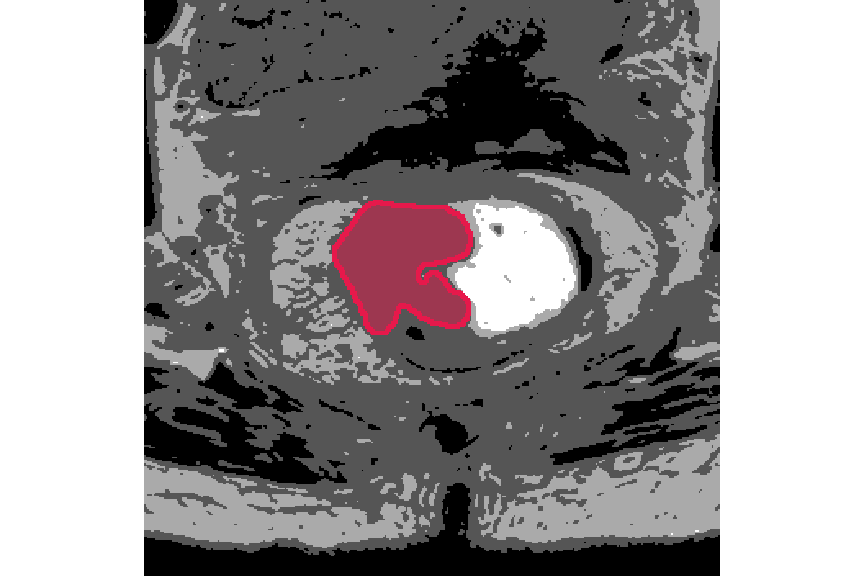

In [91]:
#image = sitk.ReadImage('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped_ZScoreNorm/LARC-RRP-011/image.nii')
#mask = sitk.ReadImage('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped_ZScoreNorm/LARC-RRP-011/1 RTSTRUCT LARC_MRS1-label.nii')
image = sitk.ReadImage('/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped_ZScoreNorm/Oxytarget_27_PRE/T2.nii')
mask = sitk.ReadImage('/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped_ZScoreNorm/Oxytarget_27_PRE/manual_an.nii')


v = iv.Viewer(view_mode='2', mask_to_show=['a'])
v.set_image(image, label='image')
v.set_mask(mask, label='mask')
v.show()

In [92]:
def pixel_distribution(pixel_list):
    """
    Plots the distribution of pixels in the images 
    """
    fig, ax = plt.subplots(figsize=(11,8))
    for i in range(len(pixel_list)):
        sns.kdeplot(data=pixel_list[i], ax=ax)
    plt.xlabel('Pixel intensity')
    plt.show()

In [94]:
def plot_pixel_distribution(df):
    
    plt.figure(figsize=(11,8))
    
    for i in range(len(df['imagePaths'])):
        array, image_size = get_array_from_image(df['imagePaths'][i])
        sns.kdeplot(data=array)
        
    plt.xlabel('Pixel intensity')
    plt.show()

<IPython.core.display.Javascript object>


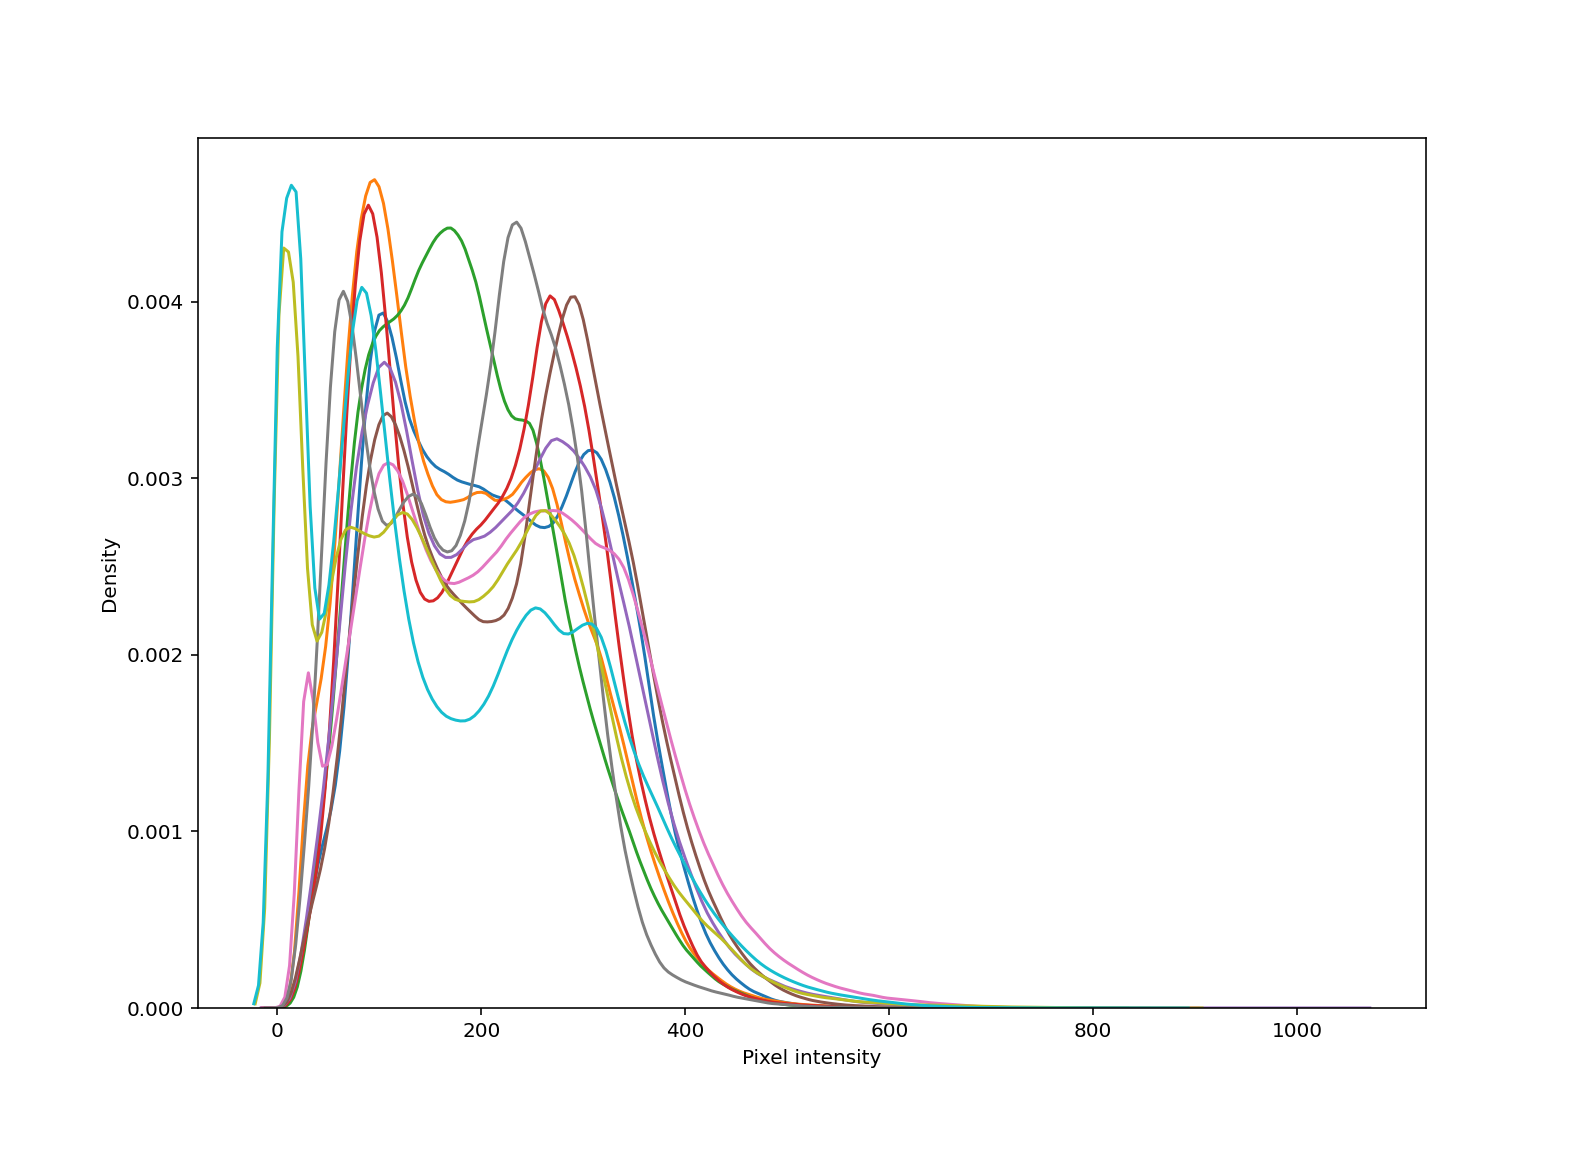

In [104]:
image_filename = 'image.nii'
mask_filename = '1 RTSTRUCT LARC_MRS1-label.nii'
#image_filename = 'T2.nii'
#mask_filename = 'manual_an.nii'

df = create_dataframe('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped', image_filename, mask_filename)

df_small = df[:10]

plot_pixel_distribution(df_small)

<IPython.core.display.Javascript object>


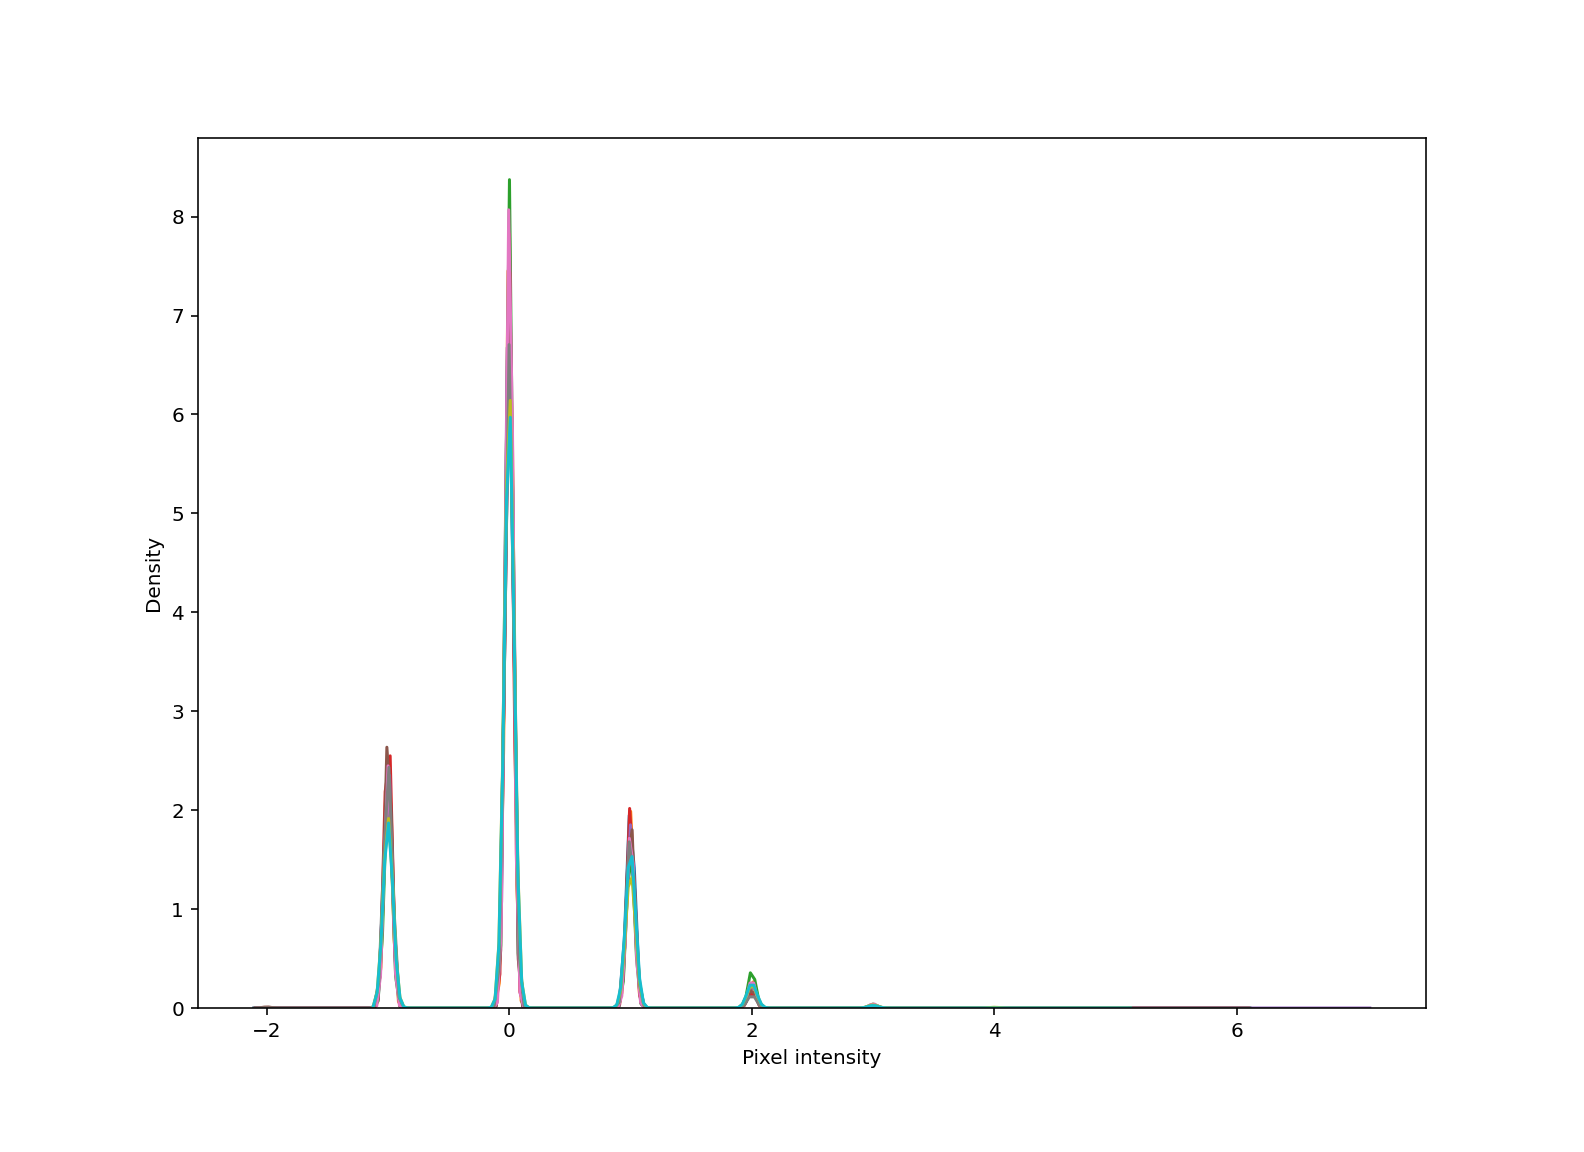

In [105]:
image_filename = 'image.nii'
mask_filename = '1 RTSTRUCT LARC_MRS1-label.nii'
#image_filename = 'T2.nii'
#mask_filename = 'manual_an.nii'

df = create_dataframe('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped_ZScoreNorm', image_filename, mask_filename)

df_small = df[:10]
df_small

plot_pixel_distribution(df_small)